
<p style="text-align:center; font-size:25px;">Applied Linear Algebra 4002</p>
<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#B33030">Project 1 : Image compression using Single value Decomposition
</font>
</h1>


<!-- <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium"> -->
<p style="line-height:200%; font-size:medium">
<font face="vazir" size=3>
    Load Libraies

</font>
</p>


In [1]:
#Matin Rezania 983112057
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در درس نیز با تجزیه svd آشنا شدید یکی از کاربرد های این تجزیه کاهش حجم داده ها است 
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این پروژه می خواهیم یک عکس به فرمت jpg را فشرده نماییم 
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابع 
<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html">plt.imshow</a>
می توانید تصویر اصلی را نمایان کنید 
</font>
</p>

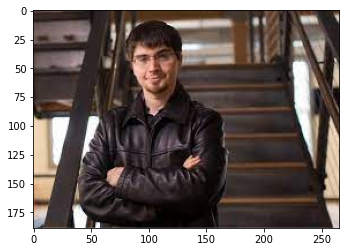

In [2]:
img_org_rep = Image.open('goodfellow.jpg')
_ = plt.imshow(img_org_rep)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابع 
<a href="https://numpy.org/doc/stable/reference/generated/numpy.array.html">np.array</a>
تصویر را به یک آرایه تبدیل کرده و سه کانال <code>(ared,agreen,ablue)</code> rgb دسته بندی کنید 
</font>
</p>

In [3]:

im = np.array(img_org_rep)# image to array

aRed = im[:,:,0]   # Red Channel
aGreen = im[:,:,1]  # Green Channel
aBlue = im[:,:,2]  # Blue Channel


In [4]:
aRed

array([[116,  88,  91, ...,  73,  77,  84],
       [118,  90,  92, ...,  76,  92,  99],
       [ 95,  67,  70, ...,  94,  91, 100],
       ...,
       [157, 150, 146, ..., 206, 220, 220],
       [125, 132, 146, ..., 214, 220, 220],
       [155, 148, 143, ..., 220, 219, 219]], dtype=uint8)

In [5]:
aGreen

array([[ 96,  68,  71, ...,  48,  49,  56],
       [ 98,  70,  72, ...,  51,  65,  72],
       [ 77,  49,  52, ...,  73,  68,  75],
       ...,
       [169, 162, 158, ..., 195, 206, 206],
       [134, 141, 155, ..., 203, 206, 206],
       [163, 156, 151, ..., 210, 208, 208]], dtype=uint8)

In [6]:
aBlue

array([[ 95,  67,  70, ...,  26,  28,  34],
       [ 97,  69,  71, ...,  31,  44,  51],
       [ 75,  47,  50, ...,  56,  50,  55],
       ...,
       [185, 178, 174, ..., 193, 205, 205],
       [149, 156, 170, ..., 201, 205, 205],
       [176, 169, 164, ..., 208, 206, 206]], dtype=uint8)

In [7]:
im # original IMAGE

array([[[116,  96,  95],
        [ 88,  68,  67],
        [ 91,  71,  70],
        ...,
        [ 73,  48,  26],
        [ 77,  49,  28],
        [ 84,  56,  34]],

       [[118,  98,  97],
        [ 90,  70,  69],
        [ 92,  72,  71],
        ...,
        [ 76,  51,  31],
        [ 92,  65,  44],
        [ 99,  72,  51]],

       [[ 95,  77,  75],
        [ 67,  49,  47],
        [ 70,  52,  50],
        ...,
        [ 94,  73,  56],
        [ 91,  68,  50],
        [100,  75,  55]],

       ...,

       [[157, 169, 185],
        [150, 162, 178],
        [146, 158, 174],
        ...,
        [206, 195, 193],
        [220, 206, 205],
        [220, 206, 205]],

       [[125, 134, 149],
        [132, 141, 156],
        [146, 155, 170],
        ...,
        [214, 203, 201],
        [220, 206, 205],
        [220, 206, 205]],

       [[155, 163, 176],
        [148, 156, 169],
        [143, 151, 164],
        ...,
        [220, 210, 208],
        [219, 208, 206],
        [219, 208, 206]]

In [8]:
OriginalSize = im.shape[0] * im.shape[1] * im.shape[2]
im.shape

(189, 266, 3)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در درس دیدیم که
 svd برابر است با 
</font>
</p> 

$A = U\Sigma V^T$

Where: 

* $U$ is an orthogonal $m \times m$ matrix; its columns are the **left-singular vectors** of $A$.
* $\Sigma$ is an orthogonal $n \times n$ matrix; its columns are the **right-singular vectors** of $A$.
* $D$ is a diagonal $m \times n$ matrix; elements along its diagonal are the **singular values** of $A$.

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در درس دیدیم که
 svd برابر است با 
 (سلول زیر را اجرا کنید)
</font>
</p> 


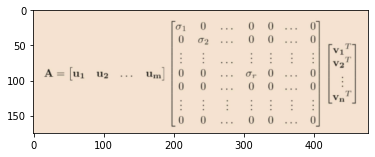

In [9]:
pic1 = Image.open('pic1.png')
_ = plt.imshow(pic1)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
که آن را می توان به شکل زیر هم نوشت
 (سلول زیر را اجرا کنید)
</font>
</p> 


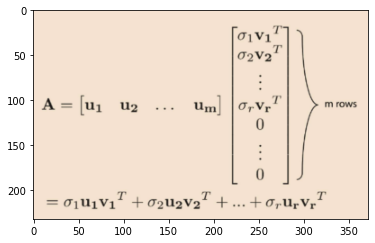

In [10]:
pic2 = Image.open('pic2.png')
_ = plt.imshow(pic2)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مشاهده می شود که که مقادیر تکین در قطر ماتریس 

$\Sigma$




</font>
</p> 





<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>


به شکل نزولی مرتب شده است لذا تاثیر عبارات ابتدایی جملات بالا 
به مراتب بیشتر از جملات بعدی خواهد بود در نتیجه 
ذخبره 
<code>کا</code>
تخمین خوبی از ماتریس به ما می دهد 



</font>
</p> 

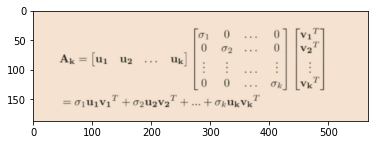

In [11]:
pic3 = Image.open('pic3.png')
_ = plt.imshow(pic3)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تابع زیر را به گونه ایی تکمیل کنید که یک کانال از نصویر را به اندازه لیمیت مشخص شده فشرده می کند و سپس آن را برگرداند 
</font>
</p> 


In [12]:
def compressChannel(channel, svdLimit):
    U, sigma, V = np.linalg.svd(channel)
    aChannelCompressedInner = np.dot(U[:,:svdLimit],np.dot(np.diag(sigma[:svdLimit]),V[:svdLimit,:]))
    
    CompressedChannel = aChannelCompressedInner.astype('uint8') # TYPE MUST BE UINT8
    return CompressedChannel

In [13]:
k = 160

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هر سه کانال تصویر را فشرده سازی کنید 
</font>
</p> 


In [14]:
RedCompressed = compressChannel(aRed, k)
GreenCompressed = compressChannel(aGreen, k)
BlueCompressed = compressChannel(aBlue, k)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابع 
<a href="https://pillow.readthedocs.io/en/stable/reference/Image.html">image.fromarray</a>
هر کانال از تصویر را 
به object عکس تغییر دهید
</font>
</p>

In [15]:
imr = Image.fromarray(aRed, mode=None)
img = Image.fromarray(aGreen, mode=None)
imb = Image.fromarray(aBlue, mode=None)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابع 
<a href="https://www.geeksforgeeks.org/python-pil-image-merge-method/">image.merge</a>
هر سه ابجکت را مرج کرده به یک تصویر تبدیل کنید 
</font>
</p>

In [16]:
Image_svd_rep = Image.merge("RGB",(imr,img,imb))


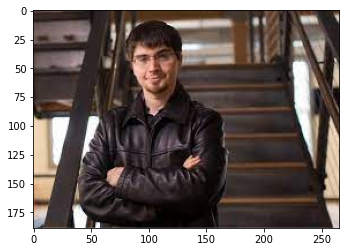

In [17]:
plt.imshow(Image_svd_rep)

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
روند بالا را به ازای مقادیر مشخص شده در جلقه زیر ادامه دهید. 
</font>
</p>

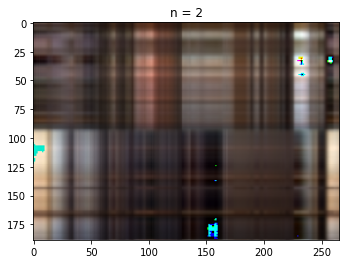

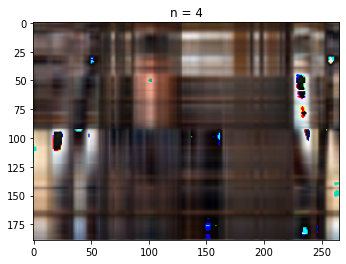

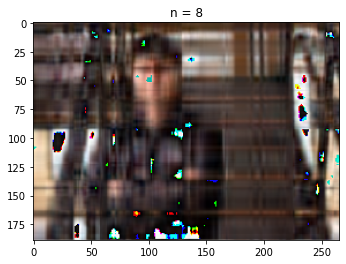

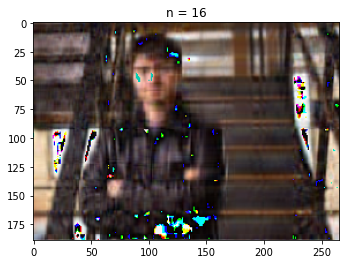

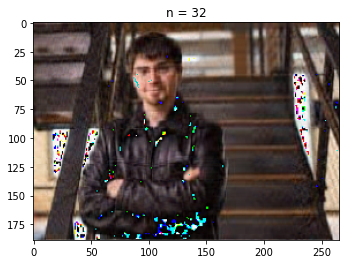

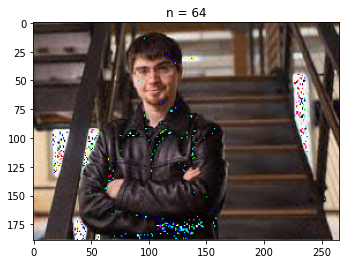

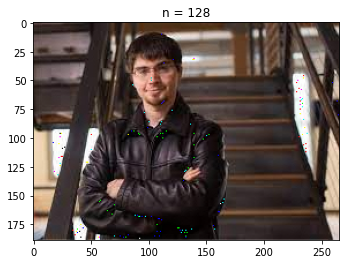

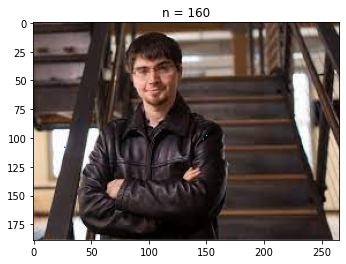

In [18]:
for i in [2, 4, 8, 16, 32, 64,128,160]:
    RedCompressed = compressChannel(aRed, i)
    GreenCompressed = compressChannel(aGreen, i)
    BlueCompressed = compressChannel(aBlue, i)
    imr = Image.fromarray(RedCompressed, mode=None)
    img = Image.fromarray(GreenCompressed, mode=None)
    imb = Image.fromarray(BlueCompressed, mode=None)
    Image_svd_rep = Image.merge("RGB",(imr,img,imb))

    
    plt.imshow(Image_svd_rep)
    title = "n = %s" % i
    plt.title(title)
    plt.show()
    

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
درصد فشرده سازی را به ازای هر یک از مقادیر بالا مشخص کنید
</font>
</p>

In [19]:
def compression_ratio(im, k):
    ratio = 100*3*(k*(im.shape[0]+im.shape[1])+k)/(im.shape[0]*im.shape[1]*im.shape[2])
    #print(ratio)
    return ratio


for i in [2, 4, 8, 16, 32, 64,128,160]:
    print(f'ratio for k: {k} is: {round(100-compression_ratio(im, i), 2)}%')

ratio for k: 160 is: 98.19%
ratio for k: 160 is: 96.37%
ratio for k: 160 is: 92.74%
ratio for k: 160 is: 85.49%
ratio for k: 160 is: 70.98%
ratio for k: 160 is: 41.95%
ratio for k: 160 is: -16.1%
ratio for k: 160 is: -45.12%
